# Projet 08 : Communiquer des résultats
# Partie 1 : Préparation des données - Fin

---
**Importation des librairies**

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

import modules_perso.sf_graphiques as sfg

<a id='1_0'></a>

In [4]:
prices = pd.read_csv("data_contract_prices.csv", sep=";", decimal=",", parse_dates=["dateref"], index_col=[0,1])
prices.head()

close_price  mid_price  real_price
contract_id dateref                                       
1           1989-11-01        28.12     28.070       75.50
            1989-11-02        27.79     27.905       75.17
            1989-11-03        28.05     27.935       75.43
            1989-11-06        28.45     28.360       75.83
            1989-11-07        28.52     28.570       75.90

In [5]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360539 entries, (1, 1989-11-01 00:00:00) to (92, 2019-11-14 00:00:00)
Data columns (total 3 columns):
close_price    360539 non-null float64
mid_price      360539 non-null float64
real_price     360539 non-null float64
dtypes: float64(3)
memory usage: 9.3 MB


In [6]:
data21 = pd.read_csv("data21jours.csv")
categories = data21.groupby("contract_id").category_name.max().reset_index()

### Calcul de la volatilité annuelle pour chaque catégorie

Comme je cherche à connaître l'évolution future du prix, j'utilise des périodes négatives.

In [7]:
prices_evolution = prices.reset_index()
prices_evolution["variation_01_pourcent"] = prices_evolution.groupby("contract_id").close_price.diff(periods=1) / \
    prices_evolution.groupby("contract_id").real_price.shift(1)
prices_evolution["volatilite_annualisée"] = 16 * prices_evolution.variation_01_pourcent.rolling(256).std(ddof=1)
prices_evolution.dropna(inplace=True)
prices_evolution = prices_evolution.merge(categories, how='left', on="contract_id")
prices_evolution.head()

,contract_id,dateref,close_price,mid_price,real_price,variation_01_pourcent,volatilite_annualisée,category_name
0,1,1990-11-07,33.55,33.680,77.45,-0.012747,0.099816,Currencies
1,1,1990-11-08,33.60,33.640,77.50,0.000646,0.099707,Currencies
2,1,1990-11-09,33.76,33.745,77.66,0.002065,0.099672,Currencies
3,1,1990-11-12,33.54,33.620,77.44,-0.002833,0.099595,Currencies
4,1,1990-11-13,32.64,33.110,76.54,-0.011622,0.100301,Currencies


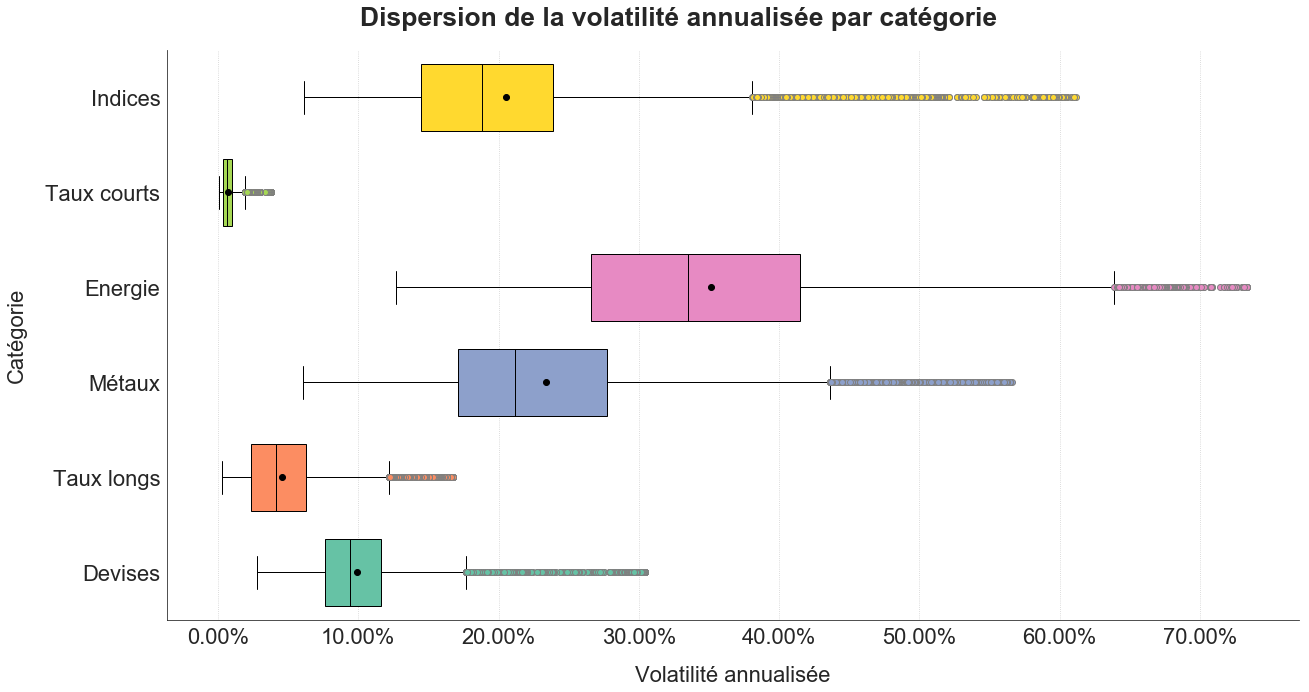

In [11]:
valeurs = [prices_evolution[prices_evolution.category_name==cat].volatilite_annualisée.values for cat in prices_evolution.category_name.unique()]
graph_volat = sfg.MyGraph(title="Dispersion de la volatilité annualisée par catégorie", figsize=(18,9))
graph_volat.add_boxplot(values=valeurs, cat_labels=prices_evolution.category_name.unique(), means=True, vertical=False)
graph_volat.set_axe('x', label="Volatilité annualisée", tick_labels_format=':.2%')
graph_volat.set_axe('y', label="Catégorie", tick_labels=["Devises","Taux longs","Métaux","Energie","Taux courts","Indices"])
fig, ax = graph_volat.fig, graph_volat.ax
plt.savefig("M1_volatilite_par_categorie.png")
plt.show()